# <center>Merging DataFrames with pandas</center>

[Data Camp Link](https://www.datacamp.com/courses/merging-dataframes-with-pandas)

[Chapter 1: Preparing data](#Chapter-1:-Preparing-data) <br>
[Chapter 2: Concatenating data](#Chapter-2:-Concatenating-data) <br>
[Chapter 3: Merging data](#Chapter-3:-Merging-data) <br>
[Chapter 4: Case Study - Summer Olympics](#Chapter-4:-Case-Study---Summer-Olympics)

# Chapter 1: Preparing data


In [1]:
# all main imports here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Reading DataFrames from multiple files

When data is spread among several files, you usually invoke pandas' `read_csv()` (or a similar data import function) multiple times to load the data into several DataFrames.

The data files for this example have been derived from a [list of Olympic medals awarded between 1896 & 2008](https://www.theguardian.com/sport/datablog/2012/jun/25/olympic-medal-winner-list-data) compiled by the Guardian.

The column labels of each DataFrame are `NOC`, `Country`, & `Total` where `NOC` is a three-letter code for the name of the country and `Total` is the number of medals of that type won (bronze, silver, or gold).

*This course touches on a lot of concepts you may have forgotten, so if you ever need a quick refresher, download the [Pandas Cheat Sheet](https://datacamp-community-prod.s3.amazonaws.com/9f0f2ae1-8bd8-4302-a67b-e17f3059d9e8) and keep it handy!*

#### Instructions

- Import `pandas` as `pd`.
- Read the file `'Bronze.csv'` into a DataFrame called `bronze`.
- Read the file `'Silver.csv'` into a DataFrame called `silver`.
- Read the file `'Gold.csv'` into a DataFrame called `gold`.
- Print the first 5 rows of the DataFrame `gold`. This has been done for you, so hit 'Submit Answer' to see the results.

In [2]:
# Import pandas
# import pandas as pd

# Read 'Bronze.csv' into a DataFrame: bronze
bronze = pd.read_csv("data/Bronze.csv")

# Read 'Silver.csv' into a DataFrame: silver
silver = pd.read_csv("data/Silver.csv")

# Read 'Gold.csv' into a DataFrame: gold
gold = pd.read_csv("data/Gold.csv")

# Print the first five rows of gold
print(gold.head())

   NOC         Country   Total
0  USA   United States  2088.0
1  URS    Soviet Union   838.0
2  GBR  United Kingdom   498.0
3  FRA          France   378.0
4  GER         Germany   407.0


---------

### Reading DataFrames from multiple files in a loop

As you saw in the video, loading data from multiple files into DataFrames is more efficient in a *loop* or a *list comprehension*.

Notice that this approach is not restricted to working with CSV files. That is, even if your data comes in other formats, as long as pandas has a suitable data import function, you can apply a loop or comprehension to generate a list of DataFrames imported from the source files.

Here, you'll continue working with [The Guardian's Olympic medal dataset](https://www.theguardian.com/sport/datablog/2012/jun/25/olympic-medal-winner-list-data).

#### Instructions

- Create a list of file names called `filenames` with three strings `'Gold.csv'`, `'Silver.csv'`, & `'Bronze.csv'`. This has been done for you.
- Use a `for` loop to create another list called `dataframes` containing the three DataFrames loaded from `filenames`:
    - Iterate over `filenames`.
    - Read each CSV file in `filenames` into a DataFrame and append it to `dataframes` by using `pd.read_csv()` inside a call to `.append()`.
- Print the first 5 rows of the first DataFrame of the list `dataframes`. This has been done for you, so hit 'Submit Answer' to see the results.

In [3]:
# Import pandas
# import pandas as pd

# Create the list of file names: filenames
filenames = ['data/Gold.csv', 'data/Silver.csv', 'data/Bronze.csv']

# Create the list of three DataFrames: dataframes
dataframes = []
for filename in filenames:
    dataframes.append(pd.read_csv(filename))

# Print top 5 rows of 1st DataFrame in dataframes
print(dataframes[0].head())

   NOC         Country   Total
0  USA   United States  2088.0
1  URS    Soviet Union   838.0
2  GBR  United Kingdom   498.0
3  FRA          France   378.0
4  GER         Germany   407.0


-----------

### Combining DataFrames from multiple data files

In this exercise, you'll *combine* the three DataFrames from earlier exercises - `gold`, `silver`, & `bronze` - into a single DataFrame called `medals`. The approach you'll use here is clumsy. Later on in the course, you'll see various powerful methods that are frequently used in practice for *concatenating* or *merging* DataFrames.

Remember, the column labels of each DataFrame are `NOC`, `Country`, and `Total`, where `NOC` is a three-letter code for the name of the country and `Total` is the number of medals of that type won.

#### Instructions

- Construct a copy of the DataFrame `gold` called `medals` using the `.copy()` method.
- Create a list called `new_labels` with entries `'NOC'`, `'Country'`, & `'Gold'`. This is the same as the column labels from `gold` with the column label `'Total'` replaced by `'Gold'`.
- Rename the columns of `medals` by assigning `new_labels` to `medals.columns`.
- Create new columns `'Silver'` and `'Bronze'` in `medals` using `silver['Total']` & `bronze['Total']`.
- Print the top 5 rows of the final DataFrame `medals`. This has been done for you, so hit 'Submit Answer' to see the result!

In [4]:
# Import pandas
# import pandas as pd

# Make a copy of gold: medals
medals = gold.copy()

# Create list of new column labels: new_labels
new_labels = ['NOC', 'Country', 'Gold']

# Rename the columns of medals using new_labels
medals.columns = new_labels

# Add columns 'Silver' & 'Bronze' to medals
medals['Silver'] = silver['Total']
medals['Bronze'] = bronze['Total']

# Print the head of medals
print(medals.head())

   NOC         Country    Gold  Silver  Bronze
0  USA   United States  2088.0  1195.0  1052.0
1  URS    Soviet Union   838.0   627.0   584.0
2  GBR  United Kingdom   498.0   591.0   505.0
3  FRA          France   378.0   461.0   475.0
4  GER         Germany   407.0   350.0   454.0


--------------

### Sorting DataFrame with the Index & columns

It is often useful to rearrange the sequence of the rows of a DataFrame by *sorting*. You don't have to implement these yourself; the principal methods for doing this are `.sort_index()` and `.sort_values()`.

In this exercise, you'll use these methods with a DataFrame of temperature values indexed by month names. You'll sort the rows alphabetically using the Index and numerically using a column. Notice, for this data, the original ordering is probably most useful and intuitive: the purpose here is for you to understand what the sorting methods do.

#### Instructions

- Read `'monthly_max_temp.csv'` into a DataFrame called `weather1` with `'Month'` as the index.
- Sort the index of `weather1` in alphabetical order using the `.sort_index()` method and store the result in `weather2`.
- Sort the index of `weather1` in *reverse* alphabetical order by specifying the additional keyword argument `ascending=False` inside `.sort_index()`.
- Use the `.sort_values()` method to sort `weather1` in increasing numerical order according to the *values* of the column `'Max TemperatureF'`.

In [5]:
# Import pandas
# import pandas as pd

# Read 'monthly_max_temp.csv' into a DataFrame: weather1
weather1 = pd.read_csv("data/monthly_max_temp.csv", index_col = 'Month')

# Print the head of weather1
print(weather1.head())

# Sort the index of weather1 in alphabetical order: weather2
weather2 = weather1.sort_index()

# Print the head of weather2
print(weather2.head())

# Sort the index of weather1 in reverse alphabetical order: weather3
weather3 = weather1.sort_index(ascending=False)

# Print the head of weather3
print(weather3.head())

# Sort weather1 numerically using the values of 'Max TemperatureF': weather4
weather4 = weather1.sort_values('Max TemperatureF')

# Print the head of weather4
print(weather4.head())

       Max TemperatureF
Month                  
Jan                  68
Feb                  60
Mar                  68
Apr                  84
May                  88
       Max TemperatureF
Month                  
Apr                  84
Aug                  86
Dec                  68
Feb                  60
Jan                  68
       Max TemperatureF
Month                  
Sep                  90
Oct                  84
Nov                  72
May                  88
Mar                  68
       Max TemperatureF
Month                  
Feb                  60
Jan                  68
Mar                  68
Dec                  68
Nov                  72


-----------

### Reindexing DataFrame from a list

Sorting methods are not the only way to change DataFrame Indexes. There is also the `.reindex()` method.

In this exercise, you'll reindex a DataFrame of quarterly-sampled mean temperature values to contain monthly samples (this is an example of *upsampling* or increasing the rate of samples, which you may recall from the [pandas Foundations](https://www.datacamp.com/courses/pandas-foundations) course).

The original data has the first month's abbreviation of the quarter (three-month interval) on the Index, namely `Apr`, `Jan`, `Jul`, and `Oct`. This data has been loaded into a DataFrame called `weather1` and has been printed in its entirety in the IPython Shell. Notice it has only four rows (corresponding to the first month of each quarter) and that the rows are not sorted chronologically.

You'll initially use a list of all twelve month abbreviations and subsequently apply the `.ffill()` method to *forward-fill* the null entries when upsampling. This list of month abbreviations has been pre-loaded as `year`.

#### Instructions

- Reorder the rows of `weather1` using the `.reindex()` method with the list `year` as the argument, which contains the abbreviations for each month.
- Reorder the rows of `weather1` just as you did above, this time chaining the `.ffill()` method to replace the null values with the last preceding non-null value.

In [6]:
weather1 = weather1.loc[['Apr', 'Jan', 'Jul', 'Oct'],:]
weather1

,Max TemperatureF
Month,
Apr,84
Jan,68
Jul,91
Oct,84


In [7]:
# Import pandas
# import pandas as pd

year = ['Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec']

# Reindex weather1 using the list year: weather2
weather2 = weather1.reindex(year)

# Print weather2
print(weather2)

print('\n')

# Reindex weather1 using the list year with forward-fill: weather3
weather3 = weather1.reindex(year).ffill()

# Print weather3
print(weather3)

       Max TemperatureF
Month                  
Jan                68.0
Feb                 NaN
Mar                 NaN
Apr                84.0
May                 NaN
Jun                 NaN
Jul                91.0
Aug                 NaN
Sep                 NaN
Oct                84.0
Nov                 NaN
Dec                 NaN


       Max TemperatureF
Month                  
Jan                68.0
Feb                68.0
Mar                68.0
Apr                84.0
May                84.0
Jun                84.0
Jul                91.0
Aug                91.0
Sep                91.0
Oct                84.0
Nov                84.0
Dec                84.0


Notice that values corresponding to months missing from `weather1` are filled with `NaN` values in `weather2`. This does not happen in `weather3`, since you used forward-fill.

----------

### Reindexing using another DataFrame Index

Another common technique is to reindex a DataFrame using the Index of another DataFrame. The DataFrame `.reindex()` method can accept the Index of a DataFrame or Series as input. You can access the Index of a DataFrame with its `.index` attribute.

The [Baby Names Dataset](https://www.data.gov/developers/baby-names-dataset/) from [data.gov](http://data.gov/) summarizes counts of names (with genders) from births registered in the US since 1881. In this exercise, you will start with two baby-names DataFrames `names_1981` and `names_1881` loaded for you.

The DataFrames `names_1981` and `names_1881` both have a MultiIndex with levels `name` and `gender` giving unique labels to counts in each row. If you're interested in seeing how the MultiIndexes were set up, `names_1981` and `names_1881` were read in using the following commands:

`names_1981 = pd.read_csv('names1981.csv', header=None, names=['name','gender','count'], index_col=(0,1))
names_1881 = pd.read_csv('names1881.csv', header=None, names=['name','gender','count'], index_col=(0,1))`

As you can see by looking at their shapes, which have been printed in the IPython Shell, the DataFrame corresponding to 1981 births is much larger, reflecting the greater diversity of names in 1981 as compared to 1881.

Your job here is to use the DataFrame `.reindex()` and `.dropna()` methods to make a DataFrame `common_names` counting names from 1881 that were still popular in 1981.

#### Instructions

- Create a new DataFrame `common_names` by reindexing `names_1981` using the `index` attribute of the DataFrame `names_1881` of older names.
- Print the shape of the new `common_names` DataFrame. This has been done for you. It should be the same as that of `names_1881`.
- Drop the rows of `common_names` that have null counts using the `.dropna()` method. These rows correspond to names that fell out of fashion between 1881 & 1981.
- Print the shape of the reassigned `common_names` DataFrame. This has been done for you, so hit 'Submit Answer' to see the result!

In [8]:
# import the dataset. there are no header in the original files
names_1981 = pd.read_csv('data/names1981.csv', header=None, names=['name','gender','count'], index_col=(0,1))
names_1881 = pd.read_csv('data/names1881.csv', header=None, names=['name','gender','count'], index_col=(0,1))

# see how it looks
names_1881.head(2)

,,count
name,gender,
Mary,F,6919
Anna,F,2698


In [9]:
# print the shapes
print("The shape of names_1981: ", names_1981.shape)
print("The shape of names_1881: ", names_1881.shape)

The shape of names_1981:  (19455, 1)
The shape of names_1881:  (1935, 1)


In [10]:
# Import pandas
# import pandas as pd

# Reindex names_1981 with index of names_1881: common_names
common_names = names_1981.reindex(names_1881.index)

# Print shape of common_names
print(common_names.shape)

# Drop rows with null counts: common_names
common_names = common_names.dropna()

# Print shape of new common_names
print(common_names.shape)

(1935, 1)
(1587, 1)


It looks like **348** names fell out of fashion between 1881 and 1981!

-----

### Broadcasting in arithmetic formulas

In this exercise, you'll work with weather data pulled from [wunderground.com](https://www.wunderground.com/). The DataFrame `weather` has been pre-loaded along with `pandas` as `pd`. It has 365 rows (observed each day of the year 2013 in Pittsburgh, PA) and 22 columns reflecting different weather measurements each day.

You'll subset a collection of columns related to temperature measurements in degrees Fahrenheit, convert them to degrees Celsius, and relabel the columns of the new DataFrame to reflect the change of units.

Remember, ordinary arithmetic operators (like `+`, `-`, `*`, and `/`) *broadcast* scalar values to conforming DataFrames when combining scalars & DataFrames in arithmetic expressions. Broadcasting also works with pandas Series and NumPy arrays.

#### Instructions

- Create a new DataFrame `temps_f` by extracting the columns `'Min TemperatureF'`, `'Mean TemperatureF'`, & `'Max TemperatureF'` from `weather` as a new DataFrame `temps_f`. To do this, pass the relevant columns as a list to `weather[]`.
- Create a new DataFrame `temps_c` from `temps_f` using the formula `(temps_f - 32) * 5/9`.
- Rename the columns of `temps_c` to replace `'F'` with `'C'` using the `.str.replace('F', 'C')` method on `temps_c.columns`.
- Print the first 5 rows of DataFrame `temps_c`. This has been done for you, so hit 'Submit Answer' to see the result!

In [11]:
# import the dataset
weather = pd.read_csv('data/pittsburgh2013.csv', index_col = 'Date', parse_dates = True)
weather[['Min TemperatureF', 'Mean TemperatureF', 'Max TemperatureF']].head(2)

,Min TemperatureF,Mean TemperatureF,Max TemperatureF
Date,,,
2013-01-01,21,28,32
2013-01-02,17,21,25


In [12]:
# Extract selected columns from weather as new DataFrame: temps_f
temps_f = weather[['Min TemperatureF', 'Mean TemperatureF', 'Max TemperatureF']]

# Convert temps_f to celsius: temps_c
temps_c = (temps_f - 32) * 5/9

# Rename 'F' in column names with 'C': temps_c.columns
temps_c.columns = temps_c.columns.str.replace('F', 'C')

# Print first 5 rows of temps_c
print(temps_c.head())

            Min TemperatureC  Mean TemperatureC  Max TemperatureC
Date                                                             
2013-01-01         -6.111111          -2.222222          0.000000
2013-01-02         -8.333333          -6.111111         -3.888889
2013-01-03         -8.888889          -4.444444          0.000000
2013-01-04         -2.777778          -2.222222         -1.111111
2013-01-05         -3.888889          -1.111111          1.111111


-----------

### Computing percentage growth of GDP

Your job in this exercise is to compute the yearly percent-change of US GDP ([Gross Domestic Product](https://en.wikipedia.org/wiki/Gross_domestic_product)) since 2008.

The data has been obtained from the [Federal Reserve Bank of St. Louis](https://fred.stlouisfed.org/series/GDP/downloaddata) and is available in the file `GDP.csv`, which contains *quarterly* data; you will resample it to annual sampling and then compute the annual growth of GDP. For a refresher on resampling, check out the relevant material from [pandas Foundations](https://campus.datacamp.com/courses/pandas-foundations/time-series-in-pandas?ex=7).

#### Instructions

- Read the file `'GDP.csv'` into a DataFrame called `gdp`, using `parse_dates=True` and `index_col='DATE'`.
- Create a DataFrame `post2008` by slicing `gdp` such that it comprises all rows from 2008 onward.
- Print the last 8 rows of the slice `post2008`. This has been done for you. This data has quarterly frequency so the indices are separated by three-month intervals.
- Create the DataFrame `yearly` by resampling the slice `post2008` by year. Remember, you need to chain `.resample()` (using the alias `'A'` for annual frequency) with some kind of aggregation; you will use the aggregation method `.last()` to select the last element when resampling.
- Compute the percentage growth of the resampled DataFrame `yearly` with `.pct_change() * 100`.

In [13]:
# import pandas as pd

# Read 'GDP.csv' into a DataFrame: gdp
gdp = pd.read_csv('data/gdp_usa.csv', index_col = 'DATE', parse_dates = True)

# Slice all the gdp data from 2008 onward: post2008
post2008 = gdp.loc['2008':, :]

# Print the last 8 rows of post2008
print(post2008.tail(8))

# Resample post2008 by year, keeping last(): yearly
yearly = post2008.resample('A').last()

# Print yearly (now it is yearly)
print(yearly)

# Compute percentage growth of yearly: yearly['growth']
yearly['growth'] = yearly.pct_change() * 100

# Print yearly again
print(yearly)

              VALUE
DATE               
2014-07-01  17569.4
2014-10-01  17692.2
2015-01-01  17783.6
2015-04-01  17998.3
2015-07-01  18141.9
2015-10-01  18222.8
2016-01-01  18281.6
2016-04-01  18436.5
              VALUE
DATE               
2008-12-31  14549.9
2009-12-31  14566.5
2010-12-31  15230.2
2011-12-31  15785.3
2012-12-31  16297.3
2013-12-31  16999.9
2014-12-31  17692.2
2015-12-31  18222.8
2016-12-31  18436.5
              VALUE    growth
DATE                         
2008-12-31  14549.9       NaN
2009-12-31  14566.5  0.114090
2010-12-31  15230.2  4.556345
2011-12-31  15785.3  3.644732
2012-12-31  16297.3  3.243524
2013-12-31  16999.9  4.311144
2014-12-31  17692.2  4.072377
2015-12-31  18222.8  2.999062
2016-12-31  18436.5  1.172707


In addition to question, let's find the maximum year where the `growth` was maximum.

In [14]:
# get the DateTime object and access its year
print(yearly['growth'].idxmax().year)

2010


It makes sense. After 2008 economic crisis, GDP went into a deep dive returning higher growth rate in the following years.

------------

### Converting currency of stocks

In this exercise, stock prices in US Dollars for the S&P 500 in 2015 have been obtained from [Yahoo Finance](https://finance.yahoo.com/). The files `sp500.csv` for sp500 and `exchange.csv` for the exchange rates are both provided to you.

Using the daily exchange rate to Pounds Sterling, your task is to convert both the Open and Close column prices.

#### Instructions

- Read the DataFrames `sp500` & `exchange` from the files `'sp500.csv'` & `'exchange.csv'` respectively..
- Use `parse_dates=True` and `index_col='Date'`.
- Extract the columns `'Open'` & `'Close'` from the DataFrame `sp500` as a new DataFrame `dollars` and print the first 5 rows.
- Construct a new DataFrame `pounds` by converting US dollars to British pounds. You'll use the `.multiply()` method of `dollars` with `exchange['GBP/USD']` and `axis='rows'`
- Print the first 5 rows of the new DataFrame `pounds`. This has been done for you, so hit 'Submit Answer' to see the results!.

In [15]:
# Import pandas
# import pandas as pd

# Read 'sp500.csv' into a DataFrame: sp500
sp500 = pd.read_csv('data/sp500.csv', index_col = 'Date', parse_dates = True)

# Read 'exchange.csv' into a DataFrame: exchange
exchange = pd.read_csv('data/exchange.csv', index_col = 'Date', parse_dates = True)

# Subset 'Open' & 'Close' columns from sp500: dollars
dollars = sp500[['Open', 'Close']]

# Print the head of dollars
print(dollars.head())

print('\n')

# Convert dollars to pounds: pounds
pounds = dollars.multiply(exchange['GBP/USD'], axis=0)

# Print the head of pounds
print(pounds.head())

                   Open        Close
Date                                
2015-01-02  2058.899902  2058.199951
2015-01-05  2054.439941  2020.579956
2015-01-06  2022.150024  2002.609985
2015-01-07  2005.550049  2025.900024
2015-01-08  2030.609985  2062.139893


                   Open        Close
Date                                
2015-01-02  1340.364425  1339.908750
2015-01-05  1348.616555  1326.389506
2015-01-06  1332.515980  1319.639876
2015-01-07  1330.562125  1344.063112
2015-01-08  1343.268811  1364.126161


-----------

# Chapter 2: Concatenating data

### Appending Series with nonunique Indices

The Series `bronze` and `silver`, which have been printed in the IPython Shell, represent the 5 countries that won the most bronze and silver Olympic medals respectively between 1896 & 2008. The Indexes of both Series are called `Country` and the values are the corresponding number of medals won.

If you were to run the command `combined = bronze.append(silver)`, how many rows would `combined` have? And how many rows would `combined.loc['United States']` return? Find out for yourself by running these commands in the IPython Shell.

In [16]:
# first create those dataframes
bronze = bronze[['Country', 'Total']].head(5).set_index('Country', drop=True)
print(bronze)

silver = silver[['Country', 'Total']].head(5).set_index('Country', drop=True)
print(silver)

                 Total
Country               
United States   1052.0
Soviet Union     584.0
United Kingdom   505.0
France           475.0
Germany          454.0
                 Total
Country               
United States   1195.0
Soviet Union     627.0
United Kingdom   591.0
France           461.0
Germany          350.0


In [17]:
combined = bronze.append(silver)
print(combined)

print('\n')

print(combined.loc['United States'])

                 Total
Country               
United States   1052.0
Soviet Union     584.0
United Kingdom   505.0
France           475.0
Germany          454.0
United States   1195.0
Soviet Union     627.0
United Kingdom   591.0
France           461.0
Germany          350.0


                Total
Country              
United States  1052.0
United States  1195.0


`combined` has 10 rows and `combined.loc['United States']` has 2 rows.

------------

### Appending pandas Series

In this exercise, you'll load sales data from the months January, February, and March into DataFrames. Then, you'll extract Series with the `'Units'` column from each and append them together with method chaining using `.append()`.

To check that the stacking worked, you'll print slices from these Series, and finally, you'll add the result to figure out the total units sold in the first quarter.

#### Instructions

- Read the files `'sales-jan-2015.csv'`, `'sales-feb-2015.csv'` and `'sales-mar-2015.csv'` into the DataFrames `jan`, `feb`, and `mar` respectively.
- Use `parse_dates=True` and `index_col='Date'`.
- Extract the `'Units'` column of `jan`, `feb`, and `mar` to create the Series `jan_units`, `feb_units`, and `mar_units` respectively.
- Construct the Series `quarter1` by appending `feb_units` to `jan_units` and then appending `mar_units` to the result. Use chained calls to the `.append()` method to do this.
- Verify that `quarter1` has the individual Series stacked vertically. To do this:
- Print the slice containing rows from `jan 27, 2015` to `feb 2, 2015`.
- Print the slice containing rows from `feb 26, 2015` to `mar 7, 2015`.
- Compute and print the total number of units sold from the Series `quarter1`. This has been done for you, so hit 'Submit Answer' to see the result!

In [18]:
# Import pandas
# import pandas as pd

# Load 'sales-jan-2015.csv' into a DataFrame: jan
jan = pd.read_csv('data/sales-jan-2015.csv', index_col='Date', parse_dates=True)

# Load 'sales-feb-2015.csv' into a DataFrame: feb
feb = pd.read_csv('data/sales-feb-2015.csv', index_col='Date', parse_dates=True)

# Load 'sales-mar-2015.csv' into a DataFrame: mar
mar = pd.read_csv('data/sales-mar-2015.csv', index_col='Date', parse_dates=True)

# Extract the 'Units' column from jan: jan_units
jan_units = jan['Units']

# Extract the 'Units' column from feb: feb_units
feb_units = feb['Units']

# Extract the 'Units' column from mar: mar_units
mar_units = mar['Units']

# Append feb_units and then mar_units to jan_units: quarter1
quarter1 = jan_units.append(feb_units).append(mar_units)

# Print the first slice from quarter1
print(quarter1.loc['jan 27, 2015':'feb 2, 2015'])

print('\n')

# Print the second slice from quarter1
print(quarter1.loc['feb 26, 2015': 'mar 7, 2015'])

# Compute & print total sales in quarter1
print(quarter1.sum())

Date
2015-01-27 07:11:55    18
2015-02-02 08:33:01     3
2015-02-02 20:54:49     9
Name: Units, dtype: int64


Date
2015-02-26 08:57:45     4
2015-02-26 08:58:51     1
2015-03-06 10:11:45    17
2015-03-06 02:03:56    17
Name: Units, dtype: int64
642


----------------

### Concatenating pandas Series along row axis

Having learned how to append Series, you'll now learn how to achieve the same result by concatenating Series instead. You'll continue to work with the sales data you've seen previously. This time, the DataFrames `jan`, `feb`, and `mar` have been pre-loaded.

Your job is to use `pd.concat()` with a list of Series to achieve the same result that you would get by chaining calls to `.append()`.

You may be wondering about the difference between `pd.concat()` and pandas' `.append()` method. One way to think of the difference is that `.append()` is a specific case of a concatenation, while `pd.concat()` gives you more flexibility, as you'll see in later exercises.

#### Instructions

- Create an empty list called `units`. This has been done for you.
- Use a `for` loop to iterate over `[jan, feb, mar]`:
    - In each iteration of the loop, append the 'Units' column of each DataFrame to units.
- Concatenate the Series contained in the list units into a longer Series called quarter1 using pd.concat().
    - Specify the keyword argument axis='rows' to stack the Series vertically.
- Verify that `quarter1` has the individual Series stacked vertically by printing slices. This has been done for you, so hit 'Submit Answer' to see the result!

In [19]:
# Initialize empty list: units
units = []

# Build the list of Series
for month in [jan, feb, mar]:
    units.append(month['Units'])

# Concatenate the list: quarter1
quarter1 = pd.concat(units, axis='rows')

# Print slices from quarter1
print(quarter1.loc['jan 27, 2015':'feb 2, 2015'])
print('\n')
print(quarter1.loc['feb 26, 2015':'mar 7, 2015'])

Date
2015-01-27 07:11:55    18
2015-02-02 08:33:01     3
2015-02-02 20:54:49     9
Name: Units, dtype: int64


Date
2015-02-26 08:57:45     4
2015-02-26 08:58:51     1
2015-03-06 10:11:45    17
2015-03-06 02:03:56    17
Name: Units, dtype: int64


-----------

### Appending DataFrames with ignore_index

In this exercise, you'll use the [Baby Names Dataset](https://www.data.gov/developers/baby-names-dataset/) (from [data.gov](http://data.gov/)) again. This time, both DataFrames `names_1981` and `names_1881` are loaded *without* specifying an Index column (so the default Indexes for both are RangeIndexes).

You'll use the DataFrame `.append()` method to make a DataFrame `combined_names`. To distinguish rows from the original two DataFrames, you'll add a `'year'` column to each with the year (1881 or 1981 in this case). In addition, you'll specify `ignore_index=True` so that the index values are not used along the concatenation axis. The resulting axis will instead be labeled `0, 1, ..., n-1`, which is useful if you are concatenating objects where the concatenation axis does not have meaningful indexing information.

#### Instructions

- Create a `'year'` column in the DataFrames `names_1881` and `names_1981`, with values of `1881` and `1981` respectively. Recall that assigning a scalar value to a DataFrame column broadcasts that value throughout.
- Create a new DataFrame called `combined_names` by appending the rows of `names_1981` underneath the rows of `names_1881`. Specify the keyword argument `ignore_index=True` to make a new RangeIndex of unique integers for each row.
- Print the shapes of all three DataFrames. This has been done for you.
- Extract all rows from `combined_names` that have the name `'Morgan'`. To do this, use the `.loc[]` accessor with an appropriate filter. The relevant column of `combined_names` here is `'name'`.

In [20]:
# import the dataset without specifying the index
names_1881 = pd.read_csv('data/names1881.csv', header=None, names=['name', 'gender', 'year'])
names_1981 = pd.read_csv('data/names1981.csv', header=None, names=['name', 'gender', 'year'])
names_1881

# Add 'year' column to names_1881 and names_1981
names_1881['year'] = 1881
names_1981['year'] = 1981

# Append names_1981 after names_1881 with ignore_index=True: combined_names
combined_names = names_1881.append(names_1981, ignore_index=True)

# Print shapes of names_1981, names_1881, and combined_names
print(names_1981.shape)
print(names_1881.shape)
print(combined_names.shape)

print('\n')

# Print all rows that contain the name 'Morgan'
print(combined_names.loc[combined_names['name'] == 'Morgan'])

(19455, 3)
(1935, 3)
(21390, 3)


         name gender  year
1283   Morgan      M  1881
2096   Morgan      F  1981
14390  Morgan      M  1981


-----------

### Concatenating pandas DataFrames along column axis

The function `pd.concat()` can concatenate DataFrames *horizontally* as well as *vertically* (vertical is the default). To make the DataFrames stack horizontally, you have to specify the keyword argument `axis=1` or `axis='columns'`.

In this exercise, you'll use weather data with maximum and mean daily temperatures sampled at different rates (quarterly versus monthly). You'll concatenate the rows of both and see that, where rows are missing in the coarser DataFrame, null values are inserted in the concatenated DataFrame. This corresponds to an outer join (which you will explore in more detail in later exercises).

The files `'quarterly_max_temp.csv'` and `'monthly_mean_temp.csv'` have been pre-loaded into the DataFrames `weather_max` and `weather_mean` respectively, and `pandas` has been imported as `pd`.

#### Instructions

- Create `weather_list`, a list of the DataFrames `weather_max` and `weather_mean`.
- Create a new DataFrame called `weather` by concatenating `weather_list` *horizontally*.
    - Pass the list to `pd.concat()` and specify the keyword argument `axis=1` to stack them horizontally.
- Print the new DataFrame `weather`.

In [21]:
# let's import the dataset
weather2 = weather[['Max TemperatureF', 'Mean TemperatureF']].resample('m').max()
weather2.head(2)

,Max TemperatureF,Mean TemperatureF
Date,,
2013-01-31,68,62
2013-02-28,60,48


In [22]:
# only get locale's abbreviated month name
weather2.index = weather2.index.strftime('%b')
weather2.index.name = 'Month'
weather2.head(2)

,Max TemperatureF,Mean TemperatureF
Month,,
Jan,68,62
Feb,60,48


In [23]:
# now get the example dataframes
weather_max = weather2.loc[['Jan', 'Apr', 'Jul', 'Oct'], 'Max TemperatureF']
weather_mean = weather2.loc[:, 'Mean TemperatureF'].sort_index()

In [24]:
# Create a list of weather_max and weather_mean
weather_list = [weather_max, weather_mean]

# Concatenate weather_list horizontally
weather = pd.concat(weather_list, axis=1, sort=False)

# Print weather
print(weather)

     Max TemperatureF  Mean TemperatureF
Jan              68.0                 62
Apr              84.0                 72
Jul              91.0                 80
Oct              84.0                 74
Aug               NaN                 77
Dec               NaN                 62
Feb               NaN                 48
Jun               NaN                 78
Mar               NaN                 55
May               NaN                 77
Nov               NaN                 60
Sep               NaN                 79


---------------

### Reading multiple files to build a DataFrame

It is often convenient to build a large DataFrame by parsing many files as DataFrames and concatenating them all at once. You'll do this here with three files, but, in principle, this approach can be used to combine data from dozens or hundreds of files.

Here, you'll work with DataFrames compiled from [The Guardian's Olympic medal dataset](https://www.theguardian.com/sport/datablog/2012/jun/25/olympic-medal-winner-list-data).

`pandas` has been imported as `pd` and the list `medal_types` has been pre-loaded for you, which contains the strings `'bronze'`, `'silver'`, and `'gold'`.

#### Instructions

- Iterate over `medal_types` in the `for` loop.
- Inside the `for` loop:
    - Create `file_name` using string interpolation with the loop variable `medal`. This has been done for you. The expression `"%s_top5.csv" % medal` evaluates as a string with the *value* of `medal` replacing `%s` in the format string.
    - Create the list of column names called `columns`. This has been done for you.
    - Read `file_name` into a DataFrame called `medal_df`. Specify the keyword arguments `header=0`, `index_col='Country'`, and `names=columns` to get the correct row and column Indexes.
- Append `medal_df` to `medals` using the list `.append()` method.
- Concatenate the list of DataFrames `medals` horizontally (using `axis='columns'`) to create a single DataFrame called `medals_df`. Print it in its entirety.

In [25]:
medal_types = ['bronze', 'silver', 'gold']

#Initialize an empyy list: medals
medals =[]

for medal in medal_types:
    # Create the file name: file_name
    file_name = "data/%s_top5.csv" % medal  # regex here
    # Create list of column names: columns
    columns = ['Country', medal]
    # Read file_name into a DataFrame: medal_df
    medal_df = pd.read_csv(file_name, header=0, index_col='Country', names=columns)
    # Append medal_df to medals
    medals.append(medal_df)

# Concatenate medals horizontally: medals_df
medals_df = pd.concat(medals, axis='columns', sort=False)

# Print medals_df
print(medals_df)

                bronze  silver    gold
United States   1052.0  1195.0  2088.0
Soviet Union     584.0   627.0   838.0
United Kingdom   505.0   591.0   498.0
France           475.0   461.0     NaN
Germany          454.0     NaN   407.0
Italy              NaN   394.0   460.0


----------

### Concatenating vertically to get MultiIndexed rows

When stacking a sequence of DataFrames vertically, it is sometimes desirable to construct a MultiIndex to indicate the DataFrame from which each row originated. This can be done by specifying the `keys` parameter in the call to `pd.concat()`, which generates a hierarchical index with the labels from `keys` as the outermost index label. So you don't have to rename the columns of each DataFrame as you load it. Instead, only the Index column needs to be specified.

Here, you'll continue working with DataFrames compiled from [The Guardian's Olympic medal dataset](https://www.theguardian.com/sport/datablog/2012/jun/25/olympic-medal-winner-list-data). Once again, `pandas` has been imported as `pd` and two lists have been pre-loaded: An empty list called `medals`, and `medal_types`, which contains the strings `'bronze'`, `'silver'`, and `'gold'`.

#### Instructions

- Within the `for` loop:
    - Read `file_name` into a DataFrame called `medal_df`. Specify the index to be `'Country'`.
    - Append `medal_df` to `medals`.
- Concatenate the list of DataFrames `medals` into a single DataFrame called `medals`. Be sure to use the keyword argument `keys=['bronze', 'silver', 'gold']` to create a vertically stacked DataFrame with a MultiIndex.
- Print the new DataFrame `medals`. This has been done for you, so hit 'Submit Answer' to see the result!

In [26]:
medals = []

for medal in medal_types:

    file_name = "data/%s_top5.csv" % medal
    
    # Read file_name into a DataFrame: medal_df
    medal_df = pd.read_csv(file_name, index_col='Country')
    
    # Append medal_df to medals
    medals.append(medal_df)
    
# Concatenate medals: medals
medals = pd.concat(medals, keys=['bronze', 'silver', 'gold'])

# Print medals in entirety
print(medals)

                        Total
       Country               
bronze United States   1052.0
       Soviet Union     584.0
       United Kingdom   505.0
       France           475.0
       Germany          454.0
silver United States   1195.0
       Soviet Union     627.0
       United Kingdom   591.0
       France           461.0
       Italy            394.0
gold   United States   2088.0
       Soviet Union     838.0
       United Kingdom   498.0
       Italy            460.0
       Germany          407.0


---------

### Slicing MultiIndexed DataFrames

This exercise picks up where the last ended (again using [The Guardian's Olympic medal dataset](https://www.theguardian.com/sport/datablog/2012/jun/25/olympic-medal-winner-list-data)).

You are provided with the MultiIndexed DataFrame as produced at the end of the preceding exercise. Your task is to sort the DataFrame and to use the `pd.IndexSlice` to extract specific slices. Check out [this exercise](https://campus.datacamp.com/courses/manipulating-dataframes-with-pandas/advanced-indexing?ex=10) from Manipulating DataFrames with pandas to refresh your memory on how to deal with MultiIndexed DataFrames.

`pandas` has been imported for you as `pd` and the DataFrame `medals` is already in your namespace.

#### Instructions

- Create a new DataFrame `medals_sorted` with the entries of `medals` sorted. Use `.sort_index(level=0)` to ensure the Index is sorted suitably.
- Print the number of bronze medals won by Germany and all of the silver medal data. This has been done for you.
- Create an alias for `pd.IndexSlice` called `idx`. A *slicer* `pd.IndexSlice` is required when slicing on the *inner* level of a MultiIndex.
- Slice all the data on medals won by the United Kingdom in the DataFrame `medals_sorted`. To do this, use the `.loc[]` accessor with `idx[:,'United Kingdom'], :`.

In [27]:
# Sort the entries of medals: medals_sorted
medals_sorted = medals.sort_index(level=0)

# Print the number of Bronze medals won by Germany
print(medals_sorted.loc[('bronze','Germany')])

# Print data about silver medals
print(medals_sorted.loc['silver'])

# Create alias for pd.IndexSlice: idx
idx = pd.IndexSlice

# Print all the data on medals won by the United Kingdom
print(medals_sorted.loc[idx[:, 'United Kingdom'], :])

Total    454.0
Name: (bronze, Germany), dtype: float64
                 Total
Country               
France           461.0
Italy            394.0
Soviet Union     627.0
United Kingdom   591.0
United States   1195.0
                       Total
       Country              
bronze United Kingdom  505.0
gold   United Kingdom  498.0
silver United Kingdom  591.0


In [28]:
# or we can use. It will give the same result.
medals_sorted.loc[(slice(None), 'United Kingdom'), :]

,,Total
,Country,
bronze,United Kingdom,505.0
gold,United Kingdom,498.0
silver,United Kingdom,591.0


-----------

### Concatenating horizontally to get MultiIndexed columns

It is also possible to construct a DataFrame with hierarchically indexed columns. For this exercise, you'll start with pandas imported and a list of three DataFrames called `dataframes`. All three DataFrames contain `'Company'`, `'Product'`, and `'Units'` columns with a `'Date'` column as the index pertaining to sales transactions during the month of February, 2015. The first DataFrame describes `Hardware` transactions, the second describes `Software` transactions, and the third, `Service` transactions.

Your task is to concatenate the DataFrames horizontally and to create a MultiIndex on the columns. From there, you can summarize the resulting DataFrame and slice some information from it.

#### Instructions

- Construct a new DataFrame `february` with MultiIndexed columns by concatenating the list `dataframes`.
- Use `axis=1` to stack the DataFrames horizontally and the keyword argument `keys=['Hardware', 'Software', 'Service']` to construct a hierarchical Index from each DataFrame.
- Print summary information from the new DataFrame `february` using the `.info()` method. This has been done for you.
- Create an alias called `idx` for `pd.IndexSlice`.
- Extract a slice called `slice_2_8` from `february` (using `.loc[]` & `idx`) that comprises rows between Feb. 2, 2015 to Feb. 8, 2015 from columns under `'Company'`.
- Print the `slice_2_8`. This has been done for you, so hit 'Submit Answer' to see the sliced data!

In [29]:
from glob import glob

file_paths = glob('data/feb*.csv')

# create empty list to append the dataframes
dataframes = []

# append
for path in file_paths:
    dataframes.append(pd.read_csv(path, index_col='Date', parse_dates=True))

In [30]:
# Concatenate dataframes: february
february = pd.concat(dataframes, axis=1, keys=['Hardware', 'Software', 'Service'])

# Print february.info()
print(february.info())

# Assign pd.IndexSlice: idx
idx = pd.IndexSlice

print('\n')

# Create the slice: slice_2_8
slice_2_8 = february.loc['2015-02-02':'2015-02-08', idx[:, 'Company']]

# Print slice_2_8
print(slice_2_8)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2015-02-02 08:33:01 to 2015-02-26 08:58:51
Data columns (total 9 columns):
(Hardware, Company)    5 non-null object
(Hardware, Product)    5 non-null object
(Hardware, Units)      5 non-null float64
(Software, Company)    6 non-null object
(Software, Product)    6 non-null object
(Software, Units)      6 non-null float64
(Service, Company)     9 non-null object
(Service, Product)     9 non-null object
(Service, Units)       9 non-null float64
dtypes: float64(3), object(6)
memory usage: 1.6+ KB
None


                            Hardware Software          Service
                             Company  Company          Company
Date                                                          
2015-02-02 08:33:01              NaN      NaN            Hooli
2015-02-02 20:54:49        Mediacore      NaN              NaN
2015-02-03 14:14:18              NaN      NaN          Initech
2015-02-04 15:36:29              NaN      NaN      

------------

### Concatenating DataFrames from a dict

You're now going to revisit the sales data you worked with earlier in the chapter. Three DataFrames `jan`, `feb`, and `mar` have been pre-loaded for you. Your task is to aggregate the sum of all sales over the `'Company'` column into a single DataFrame. You'll do this by constructing a dictionary of these DataFrames and then concatenating them.

#### Instructions

- Create a list called `month_list` consisting of the tuples `('january', jan)`, `('february', feb)`, and `('march', mar)`.
- Create an empty dictionary called `month_dict`.
- Inside the `for` loop:
    - Group `month_data` by `'Company'` and use `.sum()` to aggregate.
- Construct a new DataFrame called `sales` by concatenating the DataFrames stored in `month_dict`.
- Create an alias for `pd.IndexSlic`e and print all sales by `'Mediacore'`. This has been done for you, so hit 'Submit Answer' to see the result!

In [31]:
# Make the list of tuples: month_list
month_list = [('january', jan), ('february', feb), ('march', mar)]

# Create an empty dictionary: month_dict
month_dict = dict()

for month_name, month_data in month_list:

    # Group month_data: month_dict[month_name]
    month_dict[month_name] = month_data.groupby('Company').sum()

# Concatenate data in month_dict: sales
sales = pd.concat(month_dict)

# Print sales
print(sales)

# Print all sales by Mediacore
idx = pd.IndexSlice
print(sales.loc[idx[:, 'Mediacore'], :])

                          Units
         Company               
january  Acme Coporation     76
         Hooli               70
         Initech             37
         Mediacore           15
         Streeplex           50
february Acme Coporation     34
         Hooli               30
         Initech             30
         Mediacore           45
         Streeplex           37
march    Acme Coporation      5
         Hooli               37
         Initech             68
         Mediacore           68
         Streeplex           40
                    Units
         Company         
january  Mediacore     15
february Mediacore     45
march    Mediacore     68


<div class="alert alert-block alert-warning">
<b>Note:</b> 

We are creating that `month_list` so we can do tuple unpacking in a `for` loop.
</div>

-----------

### Concatenating DataFrames with inner join

Here, you'll continue working with DataFrames compiled from [The Guardian's Olympic medal dataset](https://www.theguardian.com/sport/datablog/2012/jun/25/olympic-medal-winner-list-data).

The DataFrames `bronze`, `silver`, and `gold` have been pre-loaded for you.

Your task is to compute an *inner join*.

#### Instructions

- Construct a list of DataFrames called `medal_list` with entries `bronze`, `silver`, and `gold`.
- Concatenate `medal_list` horizontally with an *inner join* to create `medals`.
    - Use the keyword argument `keys=['bronze', 'silver', 'gold']` to yield suitable hierarchical indexing.
    - Use `axis=1` to get horizontal concatenation.
    - Use `join='inner'` to keep only rows that share common index labels.
- Print the new DataFrame `medals`.

In [32]:
# bronze and silver are in format, gold needs to be fixed
gold = gold.set_index('Country', drop=True).drop('NOC', axis=1)

# Create the list of DataFrames: medal_list
medal_list = [bronze, silver, gold]

# Concatenate medal_list horizontally using an inner join: medals
medals = pd.concat(medal_list, keys=['bronze', 'silver', 'gold'], axis=1, join='inner')

# Print medals
print(medals)

                bronze  silver    gold
                 Total   Total   Total
Country                               
United States   1052.0  1195.0  2088.0
Soviet Union     584.0   627.0   838.0
United Kingdom   505.0   591.0   498.0
France           475.0   461.0   378.0
Germany          454.0   350.0   407.0


France, Italy, and Germany got dropped as part of the join since they are not present in each of `bronze`, `silver`, and `gold`. Therefore, the final DataFrame has only the United States, Soviet Union, and United Kingdom.

------------

### Resampling & concatenating DataFrames with inner join

In this exercise, you'll compare the historical 10-year GDP (Gross Domestic Product) growth in the US and in China. The data for the US starts in 1947 and is recorded quarterly; by contrast, the data for China starts in 1961 and is recorded annually.

You'll need to use a combination of resampling and an inner join to align the index labels. You'll need an appropriate [offset alias](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases) for resampling, and the method `.resample()` must be chained with some kind of aggregation method (`.pct_change()` and `.last()` in this case).

`pandas` has been imported as `pd`, and the DataFrames `china` and `us` have been pre-loaded, with the output of `china.head()` and `us.head()` printed in the IPython Shell.

#### Instructions

- Make a new DataFrame `china_annual` by resampling the DataFrame `china` with `.resample('A').last()` (i.e., with *annual* frequency) and chaining two method calls:
- Chain `.pct_change(10)` as an aggregation method to compute the percentage change with an offset of ten years.
- Chain `.dropna()` to eliminate rows containing null values.
- Make a new DataFrame `us_annual` by resampling the DataFrame `us` exactly as you resampled `china`.
- Concatenate `china_annual` and `us_annual` to construct a DataFrame called `gdp`. Use `join='inner'` to perform an *inner* join and use `axis=1` to concatenate *horizontally*.
- Print the result of resampling `gdp` every decade (i.e., using `.resample('10A')`) and aggregating with the method `.last()`. This has been done for you, so hit 'Submit Answer' to see the result!

In [33]:
# import the datasets
china = pd.read_csv('data/gdp_china.csv', index_col='Year', parse_dates=True)
china.columns = ['China']
us = pd.read_csv('data/gdp_usa.csv', index_col='DATE', parse_dates=True)
us.columns = ['US']
us.index.name='Year'

In [34]:
# Resample and tidy china: china_annual
china_annual = china.resample('A').last().pct_change(10).dropna()

# Resample and tidy us: us_annual
us_annual = us.resample('A').last().pct_change(10).dropna()

# Concatenate china_annual and us_annual: gdp
gdp = pd.concat([china_annual, us_annual], axis=1, join='inner')

# Resample gdp and print
print(gdp.resample('10A').last())

               China        US
Year                          
1971-12-31  0.988860  1.052270
1981-12-31  0.972048  1.750922
1991-12-31  0.962528  0.912380
2001-12-31  2.492511  0.704219
2011-12-31  4.623958  0.475082
2021-12-31  3.789936  0.361780


Just like `.rolling()` method, the argument inside `.pct_change(x)` takes the percentage change in the periods of `x` days/months/years. The keyword for that is `.pct_change(periods=10)`. 

---------

# Chapter 3: Merging data

### Merging company DataFrames

Suppose your company has operations in several different cities under several different managers. The DataFrames `revenue` and `managers` contain partial information related to the company. That is, the rows of the `city` columns don't quite match in `revenue` and `managers` (the Mendocino branch has no revenue yet since it just opened and the manager of Springfield branch recently left the company).

The DataFrames have been printed in the IPython Shell. If you were to run the command `combined = pd.merge(revenue, managers, on='city')`, how many rows would `combined` have?

In [35]:
revenue_dict = {'city': {0: 'Austin', 1: 'Denver', 2: 'Springfield'},
 'revenue': {0: 100, 1: 83, 2: 4}}
managers_dict = {'city': {0: 'Austin', 1: 'Denver', 2: 'Mendocino'},
 'manager': {0: 'Charlers', 1: 'Joel', 2: 'Brett'}}

revenue = pd.DataFrame(revenue_dict)
managers = pd.DataFrame(managers_dict)

print(revenue)
print('\n')
print(managers)

          city  revenue
0       Austin      100
1       Denver       83
2  Springfield        4


        city   manager
0     Austin  Charlers
1     Denver      Joel
2  Mendocino     Brett


In [36]:
combined = pd.merge(revenue, managers, on='city')
combined

,city,revenue,manager
0,Austin,100,Charlers
1,Denver,83,Joel


<div class="alert alert-block alert-success">
<b>Note:</b> 

Since the default strategy for `pd.merge()` is an *inner join*, `combined` will have 2 rows.
</div>

-------------

### Merging on a specific column

This exercise follows on the last one with the DataFrames `revenue` and `managers` for your company. You expect your company to grow and, eventually, to operate in cities with the same name on different states. As such, you decide that every branch should have a numerical branch identifier. Thus, you add a `branch_id` column to both DataFrames. Moreover, new cities have been added to both the `revenue` and `managers` DataFrames as well. `pandas` has been imported as `pd` and both DataFrames are available in your namespace.

At present, there should be a 1-to-1 relationship between the `city` and `branch_id` fields. In that case, the result of a merge on the `city` columns ought to give you the same output as a merge on the `branch_id` columns. Do they? Can you spot an ambiguity in one of the DataFrames?

#### Instructions

- Using `pd.merge()`, merge the DataFrames `revenue` and `managers` on the `'city'` column of each. Store the result as `merge_by_city`.
- Print the DataFrame `merge_by_city`. This has been done for you.
- Merge the DataFrames `revenue` and `managers` on the `'branch_id'` column of each. Store the result as `merge_by_id`.
- Print the DataFrame `merge_by_id`. This has been done for you, so hit 'Submit Answer' to see the result!

In [37]:
# create the dataframes
managers_dict = {'branch_id': {0: 10, 1: 20, 2: 47, 3: 31},
 'city': {0: 'Austin', 1: 'Denver', 2: 'Mendocino', 3: 'Springfield'},
 'manager': {0: 'Charles', 1: 'Joel', 2: 'Brett', 3: 'Sally'}}
revenue_dict = {'branch_id': {0: 10, 1: 20, 2: 47, 3: 31},
 'city': {0: 'Austin', 1: 'Denver', 2: 'Mendocino', 3: 'Springfield'},
 'manager': {0: 'Charles', 1: 'Joel', 2: 'Brett', 3: 'Sally'}}

managers = pd.DataFrame(managers_dict)
revenue = pd.DataFrame(revenue_dict)

In [38]:
# Merge revenue with managers on 'city': merge_by_city
merge_by_city = pd.merge(revenue, managers, on='city')

# Print merge_by_city
print(merge_by_city)

print('\n')

# Merge revenue with managers on 'branch_id': merge_by_id
merge_by_id = pd.merge(revenue, managers, on='branch_id')

# Print merge_by_id
print(merge_by_id)

   branch_id_x         city manager_x  branch_id_y manager_y
0           10       Austin   Charles           10   Charles
1           20       Denver      Joel           20      Joel
2           47    Mendocino     Brett           47     Brett
3           31  Springfield     Sally           31     Sally


   branch_id       city_x manager_x       city_y manager_y
0         10       Austin   Charles       Austin   Charles
1         20       Denver      Joel       Denver      Joel
2         47    Mendocino     Brett    Mendocino     Brett
3         31  Springfield     Sally  Springfield     Sally


----------------

### Merging on columns with non-matching labels

You continue working with the `revenue` & `managers` DataFrames from before. This time, someone has changed the field name `'city'` to `'branch'` in the `managers` table. Now, when you attempt to merge DataFrames, an exception is thrown:

> `pd.merge(revenue, managers, on='city')
Traceback (most recent call last):
    ... <text deleted> ...
    pd.merge(revenue, managers, on='city')
    ... <text deleted> ...
KeyError: 'city'`

Given this, it will take a bit more work for you to join or merge on the city/branch name. You have to specify the `left_on` and `right_on` parameters in the call to `pd.merge()`.

As before, `pandas` has been pre-imported as `pd` and the `revenue` and `managers` DataFrames are in your namespace. They have been printed in the IPython Shell so you can examine the columns prior to merging.

Are you able to merge better than in the last exercise? How should the rows with `Springfield` be handled?

#### Instructions

- Merge the DataFrames `revenue` and `managers` into a single DataFrame called `combined` using the `'city'` and `'branch'` columns from the appropriate DataFrames.
    - In your call to `pd.merge()`, you will have to specify the parameters `left_on` and `right_on` appropriately.
- Print the new DataFrame `combined`.

In [39]:
revenue = pd.DataFrame({'branch_id': {0: 10, 1: 20, 2: 30, 3: 47},
 'city': {0: 'Austin', 1: 'Denver', 2: 'Springfield', 3: 'Mendocino'},
 'revenue': {0: 100, 1: 83, 2: 4, 3: 200},
 'state': {0: 'TX', 1: 'CO', 2: 'IL', 3: 'CA'}})

managers = pd.DataFrame({'branch': {0: 'Austin', 1: 'Denver', 2: 'Mendocino', 3: 'Springfield'},
 'branch_id': {0: 10, 1: 20, 2: 47, 3: 31},
 'manager': {0: 'Charlers', 1: 'Joel', 2: 'Brett', 3: 'Sally'},
 'state': {0: 'TX', 1: 'CO', 2: 'CA', 3: 'MO'}})

# Merge revenue & managers on 'city' & 'branch': combined
combined = pd.merge(revenue, managers, left_on='city', right_on='branch')

# Print combined
combined

,branch_id_x,city,revenue,state_x,branch,branch_id_y,manager,state_y
0,10,Austin,100,TX,Austin,10,Charlers,TX
1,20,Denver,83,CO,Denver,20,Joel,CO
2,30,Springfield,4,IL,Springfield,31,Sally,MO
3,47,Mendocino,200,CA,Mendocino,47,Brett,CA


----------------

### Merging on multiple columns

Another strategy to disambiguate cities with identical names is to add information on the *states* in which the cities are located. To this end, you add a column called `state` to both DataFrames from the preceding exercises. Again, `pandas` has been pre-imported as `pd` and the `revenue` and `managers` DataFrames are in your namespace.

Your goal in this exercise is to use `pd.merge()` to merge DataFrames using multiple columns (using `'branch_id'`, `'city'`, and `'state'` in this case).

Are you able to match all your company's branches correctly?

#### Instructions

- Create a column called `'state'` in the DataFrame `revenue`, consisting of the list `['TX','CO','IL','CA']`.
- Create a column called `'state'` in the DataFrame `managers`, consisting of the list `['TX','CO','CA','MO']`.
- Merge the DataFrames `revenue` and `managers` using *three* columns :`'branch_id'`, `'city'`, and `'state'`. Pass them in as a list to the `on` paramater of `pd.merge()`.

In [40]:
revenue = pd.DataFrame({'branch_id': {0: 10, 1: 20, 2: 30, 3: 47},
 'city': {0: 'Austin', 1: 'Denver', 2: 'Springfield', 3: 'Mendocino'},
 'revenue': {0: 100, 1: 83, 2: 4, 3: 200}})
managers = pd.DataFrame({'branch_id': {0: 10, 1: 20, 2: 47, 3: 31},
 'city': {0: 'Austin', 1: 'Denver', 2: 'Mendocino', 3: 'Springfield'},
 'manager': {0: 'Charlers', 1: 'Joel', 2: 'Brett', 3: 'Sally'}})

# Add 'state' column to revenue: revenue['state']
revenue['state'] = ['TX','CO','IL','CA']

# Add 'state' column to managers: managers['state']
managers['state'] = ['TX','CO','CA','MO']

# Merge revenue & managers on 'branch_id', 'city', & 'state': combined
combined = pd.merge(revenue, managers, on=['branch_id', 'city', 'state'])

# Print combined
print(combined)

   branch_id       city  revenue state   manager
0         10     Austin      100    TX  Charlers
1         20     Denver       83    CO      Joel
2         47  Mendocino      200    CA     Brett


-------------

### Left & right merging on multiple columns

You now have, in addition to the `revenue` and `managers` DataFrames from prior exercises, a DataFrame `sales` that summarizes units sold from specific branches (identified by `city` and `state` but not `branch_id`).

Once again, the `managers` DataFrame uses the label `branch` in place of `city` as in the other two DataFrames. Your task here is to employ *left* and *right* merges to preserve data and identify where data is missing.

By merging `revenue` and `sales` with a *right* merge, you can identify the missing `revenue` values. Here, you don't need to specify `left_on` or `right_on` because the columns to merge on have matching labels.

By merging `sales` and `managers` with a *left* merge, you can identify the missing `manager`. Here, the columns to merge on have conflicting labels, so you must specify `left_on` and `right_on`. In both cases, you're looking to figure out how to connect the fields in rows containing `Springfield`.

`pandas` has been imported as `pd` and the three DataFrames `revenue`, `managers`, and `sales` have been pre-loaded. They have been printed for you to explore in the IPython Shell.

#### Instructions

- Execute a right merge using `pd.merge()` with `revenue` and `sales` to yield a new DataFrame `revenue_and_sales`.
    - Use `how='right'` and `on=['city', 'state']`.
- Print the new DataFrame `revenue_and_sales`. This has been done for you.
- Execute a left merge with `sales` and `managers` to yield a new DataFrame `sales_and_managers`.
    - Use `how='left'`, `left_on=['city', 'state']`, and `right_on=['branch', 'state']`.
- Print the new DataFrame `sales_and_managers`. This has been done for you, so hit 'Submit Answer' to see the result!

In [41]:
sales = pd.DataFrame({'city': {0: 'Mendocino',
  1: 'Denver',
  2: 'Austin',
  3: 'Springfield',
  4: 'Springfield'},
 'state': {0: 'CA', 1: 'CO', 2: 'TX', 3: 'MO', 4: 'IL'},
 'units': {0: 1, 1: 4, 2: 2, 3: 5, 4: 1}})
managers.columns = ['branch_id', 'branch', 'manager', 'state']

# Merge revenue and sales: revenue_and_sales
revenue_and_sales = pd.merge(revenue, sales, how='right', on=['city', 'state'])

# Print revenue_and_sales
print(revenue_and_sales)

# Merge sales and managers: sales_and_managers
sales_and_managers = pd.merge(sales, managers, how='left', \
                              left_on=['city', 'state'], right_on=['branch', 'state'])
print('\n')

# Print sales_and_managers
print(sales_and_managers)

   branch_id         city  revenue state  units
0       10.0       Austin    100.0    TX      2
1       20.0       Denver     83.0    CO      4
2       30.0  Springfield      4.0    IL      1
3       47.0    Mendocino    200.0    CA      1
4        NaN  Springfield      NaN    MO      5


          city state  units  branch_id       branch   manager
0    Mendocino    CA      1       47.0    Mendocino     Brett
1       Denver    CO      4       20.0       Denver      Joel
2       Austin    TX      2       10.0       Austin  Charlers
3  Springfield    MO      5       31.0  Springfield     Sally
4  Springfield    IL      1        NaN          NaN       NaN


-----------

### Merging DataFrames with outer join

This exercise picks up where the previous one left off. The DataFrames `revenue`, `managers`, and `sales` are pre-loaded into your namespace (and, of course, `pandas` is imported as `pd`). Moreover, the merged DataFrames `revenue_and_sales` and `sales_and_managers` have been pre-computed exactly as you did in the previous exercise.

The merged DataFrames contain enough information to construct a DataFrame with 5 rows with all known information correctly aligned and each branch listed only once. You will try to merge the merged DataFrames on all matching keys (which computes an inner join by default). You can compare the result to an outer join and also to an outer join with restricted subset of columns as keys.

#### Instructions

- Merge `sales_and_managers` with `revenue_and_sales`. Store the result as `merge_default`.
- Print `merge_default`. This has been done for you.
- Merge `sales_and_managers` with `revenue_and_sales` using `how='outer'`. Store the result as `merge_outer`.
- Print `merge_outer`. This has been done for you.
- Merge `sales_and_managers` with `revenue_and_sales` only on `['city','state']` using an outer join. Store the result as `merge_outer_on` and hit 'Submit Answer' to see what the merged DataFrames look like!

In [42]:
# Perform the first merge: merge_default
merge_default = pd.merge(sales_and_managers, revenue_and_sales)

# Print merge_default
print(merge_default)

print('\n')

# Perform the second merge: merge_outer
merge_outer = pd.merge(sales_and_managers, revenue_and_sales, how='outer')

# Print merge_outer
print(merge_outer)

print('\n')

# Perform the third merge: merge_outer_on
merge_outer_on = pd.merge(sales_and_managers, revenue_and_sales, how='outer', on=['city', 'state'])

# Print merge_outer_on
print(merge_outer_on)

        city state  units  branch_id     branch   manager  revenue
0  Mendocino    CA      1       47.0  Mendocino     Brett    200.0
1     Denver    CO      4       20.0     Denver      Joel     83.0
2     Austin    TX      2       10.0     Austin  Charlers    100.0


          city state  units  branch_id       branch   manager  revenue
0    Mendocino    CA      1       47.0    Mendocino     Brett    200.0
1       Denver    CO      4       20.0       Denver      Joel     83.0
2       Austin    TX      2       10.0       Austin  Charlers    100.0
3  Springfield    MO      5       31.0  Springfield     Sally      NaN
4  Springfield    IL      1        NaN          NaN       NaN      NaN
5  Springfield    IL      1       30.0          NaN       NaN      4.0
6  Springfield    MO      5        NaN          NaN       NaN      NaN


          city state  units_x  branch_id_x       branch   manager  \
0    Mendocino    CA        1         47.0    Mendocino     Brett   
1       Denver    CO  

--------------

### Using merge_ordered()

This exercise uses pre-loaded DataFrames `austin` and `houston` that contain weather data from the cities Austin and Houston respectively. They have been printed in the IPython Shell for you to examine.

Weather conditions were recorded on separate days and you need to merge these two DataFrames together such that the dates are ordered. To do this, you'll use `pd.merge_ordered()`. After you're done, note the order of the rows before and after merging.

#### Instructions

- Perform an ordered merge on `austin` and `houston` using `pd.merge_ordered()`. Store the result as `tx_weather`.
- Print `tx_weather`. You should notice that the rows are sorted by the date but it is not possible to tell which observation came from which city.
- Perform another ordered merge on `austin` and `houston`.
    - This time, specify the keyword arguments `on='date'` and `suffixes=['_aus','_hus']` so that the rows can be distinguished. Store the result as `tx_weather_suff`.
- Print `tx_weather_suff` to examine its contents. This has been done for you.
- Perform a third ordered merge on `austin` and `houston`.
    - This time, in addition to the `on` and `suffixes` parameters, specify the keyword argument `fill_method='ffill'` to use *forward-filling* to replace `NaN` entries with the most recent non-null entry, and hit 'Submit Answer' to examine the contents of the merged DataFrames!

In [43]:
from pandas import Timestamp
austin = pd.DataFrame({'date': {0: Timestamp('2016-01-01 00:00:00'),
  1: Timestamp('2016-02-08 00:00:00'),
  2: Timestamp('2016-01-17 00:00:00')},
 'ratings': {0: 'Cloudy', 1: 'Cloudy', 2: 'Sunny'}})

houston = pd.DataFrame({'date': {0: Timestamp('2016-01-04 00:00:00'),
  1: Timestamp('2016-01-01 00:00:00'),
  2: Timestamp('2016-03-01 00:00:00')},
 'ratings': {0: 'Rainy', 1: 'Cloudy', 2: 'Sunny'}})

# Perform the first ordered merge: tx_weather
tx_weather = pd.merge_ordered(austin, houston)

# Print tx_weather
print(tx_weather)

# Perform the second ordered merge: tx_weather_suff
tx_weather_suff = pd.merge_ordered(austin, houston, on='date', suffixes=['_aus', '_hus'])

print('\n')

# Print tx_weather_suff
print(tx_weather_suff)

# Perform the third ordered merge: tx_weather_ffill
tx_weather_ffill = pd.merge_ordered(austin, houston, on='date', suffixes=['_aus', '_hus'], fill_method='ffill')

# Print tx_weather_ffill
tx_weather_ffill

        date ratings
0 2016-01-01  Cloudy
1 2016-01-04   Rainy
2 2016-01-17   Sunny
3 2016-02-08  Cloudy
4 2016-03-01   Sunny


        date ratings_aus ratings_hus
0 2016-01-01      Cloudy      Cloudy
1 2016-01-04         NaN       Rainy
2 2016-01-17       Sunny         NaN
3 2016-02-08      Cloudy         NaN
4 2016-03-01         NaN       Sunny


,date,ratings_aus,ratings_hus
0,2016-01-01,Cloudy,Cloudy
1,2016-01-04,Cloudy,Rainy
2,2016-01-17,Sunny,Rainy
3,2016-02-08,Cloudy,Rainy
4,2016-03-01,Cloudy,Sunny


-------------

### Using merge_asof()

Similar to `pd.merge_ordered()`, the `pd.merge_asof()` function will also merge values in order using the `on` column, but for each row in the left DataFrame, only rows from the right DataFrame whose `'on'` column values are **less** than the left value will be kept.

This function can be used to align disparate datetime frequencies without having to first resample.

Here, you'll merge monthly oil prices (US dollars) into a full automobile fuel efficiency dataset. The oil and automobile DataFrames have been pre-loaded as `oil` and `auto`. The first 5 rows of each have been printed in the IPython Shell for you to explore.

These datasets will align such that the first price of the year will be broadcast into the rows of the automobiles DataFrame. This is considered correct since by the start of any given year, most automobiles for that year will have already been manufactured.

You'll then inspect the merged DataFrame, resample by year and compute the mean `'Price'` and `'mpg'`. You should be able to see a trend in these two columns, that you can confirm by computing the Pearson correlation between resampled `'Price'` and `'mpg'`.

#### Instructions

- Merge `auto` and `oil` using `pd.merge_asof()` with `left_on='yr'` and `right_on='Date'`. Store the result as `merged`.
- Print the tail of `merged`. This has been done for you.
- Resample `merged` using `'A'` (annual frequency), and `on='Date'`. Select `[['mpg','Price']]` and aggregate the mean. Store the result as `yearly`.
- Hit Submit Answer to examine the contents of `yearly` and `yearly.corr()`, which shows the Pearson correlation between the resampled `'Price'` and `'mpg'`.

In [44]:
# import the dataset
oil = pd.read_csv('data/oil_price.csv', parse_dates=['Date'])
oil.head(3)

,Date,Price
0,1970-01-01,3.35
1,1970-02-01,3.35
2,1970-03-01,3.35


In [45]:
auto = pd.read_csv('data/automobiles.csv', parse_dates=['yr'])
auto.head(3)

,mpg,cyl,displ,hp,weight,accel,yr,origin,name
0,18.0,8,307.0,130,3504,12.0,1970-01-01,US,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,1970-01-01,US,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,1970-01-01,US,plymouth satellite


In [46]:
# Merge auto and oil: merged
merged = pd.merge_asof(auto, oil, left_on='yr', right_on='Date')

# Print the tail of merged
print(merged.tail())

# Resample merged: yearly
yearly = merged.resample('A', on='Date')[['mpg', 'Price']].mean()

# Print yearly
print(yearly)

# print yearly.corr()
print(yearly.corr())

      mpg  cyl  displ  hp  weight  accel         yr  origin             name  \
387  27.0    4  140.0  86    2790   15.6 1982-01-01      US  ford mustang gl   
388  44.0    4   97.0  52    2130   24.6 1982-01-01  Europe        vw pickup   
389  32.0    4  135.0  84    2295   11.6 1982-01-01      US    dodge rampage   
390  28.0    4  120.0  79    2625   18.6 1982-01-01      US      ford ranger   
391  31.0    4  119.0  82    2720   19.4 1982-01-01      US       chevy s-10   

          Date  Price  
387 1982-01-01  33.85  
388 1982-01-01  33.85  
389 1982-01-01  33.85  
390 1982-01-01  33.85  
391 1982-01-01  33.85  
                  mpg  Price
Date                        
1970-12-31  17.689655   3.35
1971-12-31  21.111111   3.56
1972-12-31  18.714286   3.56
1973-12-31  17.100000   3.56
1974-12-31  22.769231  10.11
1975-12-31  20.266667  11.16
1976-12-31  21.573529  11.16
1977-12-31  23.375000  13.90
1978-12-31  24.061111  14.85
1979-12-31  25.093103  14.85
1980-12-31  33.803704  32.5

-----------

# Chapter 4: Case Study - Summer Olympics

### Loading Olympic edition DataFrame

In this chapter, you'll be using [The Guardian's Olympic medal dataset](https://www.theguardian.com/sport/datablog/2012/jun/25/olympic-medal-winner-list-data).

Your first task here is to prepare a DataFrame `editions` from a *tab-separated values* (TSV) file.

Initially, `editions` has 26 rows (one for each Olympic edition, i.e., a year in which the Olympics was held) and 7 columns: `'Edition'`, `'Bronze'`, `'Gold'`, `'Silver'`, `'Grand Total'`, `'City'`, and `'Country'`.

For the analysis that follows, you won't need the overall medal counts, so you want to keep only the useful columns from `editions`: `'Edition'`, `'Grand Total'`, `City`, and `Country`.

#### Instructions

- Read `file_path` into a DataFrame called `editions`. The identifier `file_path` has been pre-defined with the filename `'Summer Olympic medallists 1896 to 2008 - EDITIONS.tsv'`. You'll have to use the option `sep='\t'` because the file uses tabs to delimit fields (`pd.read_csv()` expects commas by default).
- Select only the columns `'Edition'`, `'Grand Total'`, `'City'`, and `'Country'` from editions.
- Print the final DataFrame `editions` in entirety (there are only 26 rows). This has been done for you, so hit 'Submit Answer' to see the result!

In [47]:
#Import pandas
# import pandas as pd

# Create file path: file_path
file_path = 'data/Summer Olympic medalists 1896 to 2008 - EDITIONS.tsv'

# Load DataFrame from file_path: editions
editions = pd.read_csv(file_path, sep='\t')

# Extract the relevant columns: editions
editions = editions[['Edition', 'Grand Total', 'City', 'Country']]

# Print editions DataFrame
editions

,Edition,Grand Total,City,Country
0,1896,151,Athens,Greece
1,1900,512,Paris,France
2,1904,470,St. Louis,United States
3,1908,804,London,United Kingdom
4,1912,885,Stockholm,Sweden
5,1920,1298,Antwerp,Belgium
6,1924,884,Paris,France
7,1928,710,Amsterdam,Netherlands
8,1932,615,Los Angeles,United States
9,1936,875,Berlin,Germany


---------

### Loading IOC codes DataFrame

Your task here is to prepare a DataFrame `ioc_codes` from a comma-separated values (CSV) file.

Initially, `ioc_codes` has 200 rows (one for each country) and 3 columns: `'Country'`, `'NOC'`, & `'ISO code'`.

For the analysis that follows, you want to keep only the useful columns from `ioc_codes`: `'Country'` and `'NOC'` (the column `'NOC'` contains three-letter codes representing each country).

#### Instructions

- Read `file_path` into a DataFrame called `ioc_codes`. The identifier `file_path` has been pre-defined with the filename `'Summer Olympic medallists 1896 to 2008 - IOC COUNTRY CODES.csv'`.
- Select only the columns `'Country'` and `'NOC'` from `ioc_codes`.
- Print the leading 5 and trailing 5 rows of the DataFrame `ioc_codes` (there are 200 rows in total). This has been done for you, so hit 'Submit Answer' to see the result!

In [48]:
# Import pandas
# import pandas as pd

# Create the file path: file_path
file_path = 'data/Summer Olympic medalists 1896 to 2008 - IOC COUNTRY CODES.csv'

# Load DataFrame from file_path: ioc_codes
ioc_codes = pd.read_csv(file_path)

# Extract the relevant columns: ioc_codes
ioc_codes = ioc_codes[['Country', 'NOC']]

# Print first and last 5 rows of ioc_codes
print(ioc_codes.head())
print('\n')
print(ioc_codes.tail())

           Country  NOC
0      Afghanistan  AFG
1          Albania  ALB
2          Algeria  ALG
3  American Samoa*  ASA
4          Andorra  AND


             Country  NOC
196          Vietnam  VIE
197  Virgin Islands*  ISV
198            Yemen  YEM
199           Zambia  ZAM
200         Zimbabwe  ZIM


-----------

### Building medals DataFrame

Here, you'll start with the DataFrame `editions` from the previous exercise.

You have a sequence of files `summer_1896.csv`, `summer_1900.csv`, ..., `summer_2008.csv`, one for each Olympic edition (year).

You will build up a dictionary `medals_dict` with the Olympic editions (years) as keys and DataFrames as values.

The dictionary is built up inside a loop over the `year` of each Olympic edition (from the Index of editions).

Once the dictionary of DataFrames is built up, you will combine the DataFrames using `pd.concat()`.

#### Instructions

- Within the `for` loop:
    - Create the file path. This has been done for you.
    - Read `file_path` into a DataFrame. Assign the result to the `year` key of `medals_dict`.
    - Select only the columns `'Athlete'`, `'NOC'`, and `'Medal'` from `medals_dict[year]`.
    - Create a new column called `'Edition'` in the DataFrame `medals_dict[year]` whose entries are all `year`.
- Concatenate the dictionary of DataFrames `medals_dict` into a DataFame called `medals`. Specify the keyword argument `ignore_index=True` to prevent repeated integer indices.
- Print the first and last 5 rows of `medals`. This has been done for you, so hit 'Submit Answer' to see the result!

In [49]:
# Import pandas
# import pandas as pd

# # Create empty dictionary: medals_dict
# medals_dict = {}

# for year in editions['Edition']:

#     # Create the file path: file_path
#     file_path = 'summer_{:d}.csv'.format(year)
    
#     # Load file_path into a DataFrame: medals_dict[year]
#     medals_dict[year] = pd.read_csv(file_path)
    
#     # Extract relevant columns: medals_dict[year]
#     medals_dict[year] = medals_dict[year][['Athlete', 'NOC', 'Medal']]
    
#     # Assign year to column 'Edition' of medals_dict
#     medals_dict[year]['Edition'] = year
    
# # Concatenate medals_dict: medals
# medals = pd.concat(medals_dict, ignore_index=True)

# # Print first and last 5 rows of medals
# print(medals.head())
# print(medals.tail())

There are too many `.csv` files in this question, therefore passing without execution. Final `medals` dataframe has been created in the following cell. For `file_path = 'summer_{:d}.csv'.format(year)`  [click here](https://stackoverflow.com/questions/34252018/what-does-d-mean-strings-python-3-4-3).

In [50]:
medals = pd.read_csv('data/Summer Olympic medalists 1896 to 2008 - ALL MEDALISTS.tsv', sep='\t', skiprows=4)
medals = medals[['Athlete', 'NOC', 'Medal', 'Edition']]
medals.head(2)

,Athlete,NOC,Medal,Edition
0,"HAJOS, Alfred",HUN,Gold,1896
1,"HERSCHMANN, Otto",AUT,Silver,1896


----------

### Counting medals by country/edition in a pivot table

Here, you'll start with the concatenated DataFrame `medals` from the previous exercise.

You can construct a *pivot table* to see the number of medals each country won in each year. The result is a new DataFrame with the Olympic edition on the Index and with 138 country `NOC` codes as columns. If you want a refresher on pivot tables, it may be useful to refer back to the relevant exercises in [Manipulating DataFrames with pandas](https://campus.datacamp.com/courses/manipulating-dataframes-with-pandas/rearranging-and-reshaping-data?ex=14).

#### Instructions

- Construct a pivot table from the DataFrame `medals`, aggregating by `count` (by specifying the `aggfunc` parameter). Use `'Edition'` as the `index`, `'Athlete'` for the `values`, and `'NOC'` for the columns.
- Print the first & last 5 rows of `medal_counts`. This has been done for you, so hit 'Submit Answer' to see the results!

In [51]:
# Construct the pivot_table: medal_counts
medal_counts = medals.pivot_table(index = 'Edition', columns = 'NOC', values = 'Athlete', aggfunc = 'count')

# Print the first & last 5 rows of medal_counts
print(medal_counts.head())
medal_counts.tail()

NOC      AFG  AHO  ALG   ANZ  ARG  ARM  AUS   AUT  AZE  BAH  ...  URS  URU  \
Edition                                                      ...             
1896     NaN  NaN  NaN   NaN  NaN  NaN  2.0   5.0  NaN  NaN  ...  NaN  NaN   
1900     NaN  NaN  NaN   NaN  NaN  NaN  5.0   6.0  NaN  NaN  ...  NaN  NaN   
1904     NaN  NaN  NaN   NaN  NaN  NaN  NaN   1.0  NaN  NaN  ...  NaN  NaN   
1908     NaN  NaN  NaN  19.0  NaN  NaN  NaN   1.0  NaN  NaN  ...  NaN  NaN   
1912     NaN  NaN  NaN  10.0  NaN  NaN  NaN  14.0  NaN  NaN  ...  NaN  NaN   

NOC        USA  UZB  VEN  VIE  YUG  ZAM  ZIM   ZZX  
Edition                                             
1896      20.0  NaN  NaN  NaN  NaN  NaN  NaN   6.0  
1900      55.0  NaN  NaN  NaN  NaN  NaN  NaN  34.0  
1904     394.0  NaN  NaN  NaN  NaN  NaN  NaN   8.0  
1908      63.0  NaN  NaN  NaN  NaN  NaN  NaN   NaN  
1912     101.0  NaN  NaN  NaN  NaN  NaN  NaN   NaN  

[5 rows x 138 columns]


NOC,AFG,AHO,ALG,ANZ,ARG,ARM,AUS,AUT,AZE,BAH,...,URS,URU,USA,UZB,VEN,VIE,YUG,ZAM,ZIM,ZZX
Edition,,,,,,,,,,,,,,,,,,,,,
1992,NaN,NaN,2.0,NaN,2.0,NaN,57.0,6.0,NaN,1.0,...,NaN,NaN,224.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996,NaN,NaN,3.0,NaN,20.0,2.0,132.0,3.0,1.0,5.0,...,NaN,NaN,260.0,2.0,NaN,NaN,26.0,1.0,NaN,NaN
2000,NaN,NaN,5.0,NaN,20.0,1.0,183.0,4.0,3.0,6.0,...,NaN,1.0,248.0,4.0,NaN,1.0,26.0,NaN,NaN,NaN
2004,NaN,NaN,NaN,NaN,47.0,NaN,157.0,8.0,5.0,2.0,...,NaN,NaN,264.0,5.0,2.0,NaN,NaN,NaN,3.0,NaN
2008,1.0,NaN,2.0,NaN,51.0,6.0,149.0,3.0,7.0,5.0,...,NaN,NaN,315.0,6.0,1.0,1.0,NaN,NaN,4.0,NaN


------------

### Computing fraction of medals per Olympic edition

In this exercise, you'll start with the DataFrames `editions`, `medals`, & `medal_counts` from prior exercises.

You can extract a Series with the total number of medals awarded in each Olympic edition.

The DataFrame `medal_counts` can be divided row-wise by the total number of medals awarded each edition; the method `.divide()` performs the broadcast as you require.

This gives you a normalized indication of each country's performance in each edition.

#### Instructions

- Set the index of the DataFrame `editions` to be `'Edition'` (using the method `.set_index()`). Save the result as `totals`.
- Extract the `'Grand Total'` column from `totals` and assign the result back to `totals`.
- Divide the DataFrame `medal_counts` by `totals` along each row. You will have to use the `.divide()` method with the option `axis='rows'`. Assign the result to `fractions`.
- Print first & last 5 rows of the DataFrame `fractions`. This has been done for you, so hit 'Submit Answer' to see the results!

In [52]:
# Set Index of editions: totals
totals = editions.set_index('Edition')

# Reassign totals['Grand Total']: totals
totals = totals['Grand Total']

# Divide medal_counts by totals: fractions
fractions = medal_counts.divide(totals, axis='rows')

# Print first & last 5 rows of fractions
print(fractions.head())
print(fractions.tail())

NOC      AFG  AHO  ALG       ANZ  ARG  ARM       AUS       AUT  AZE  BAH  ...  \
Edition                                                                   ...   
1896     NaN  NaN  NaN       NaN  NaN  NaN  0.013245  0.033113  NaN  NaN  ...   
1900     NaN  NaN  NaN       NaN  NaN  NaN  0.009766  0.011719  NaN  NaN  ...   
1904     NaN  NaN  NaN       NaN  NaN  NaN       NaN  0.002128  NaN  NaN  ...   
1908     NaN  NaN  NaN  0.023632  NaN  NaN       NaN  0.001244  NaN  NaN  ...   
1912     NaN  NaN  NaN  0.011299  NaN  NaN       NaN  0.015819  NaN  NaN  ...   

NOC      URS  URU       USA  UZB  VEN  VIE  YUG  ZAM  ZIM       ZZX  
Edition                                                              
1896     NaN  NaN  0.132450  NaN  NaN  NaN  NaN  NaN  NaN  0.039735  
1900     NaN  NaN  0.107422  NaN  NaN  NaN  NaN  NaN  NaN  0.066406  
1904     NaN  NaN  0.838298  NaN  NaN  NaN  NaN  NaN  NaN  0.017021  
1908     NaN  NaN  0.078358  NaN  NaN  NaN  NaN  NaN  NaN       NaN  
1912     NaN

Now the dataframe values are normalized. It makes sense. In the 1896 `Edition` there were **151** total medals, therefore let's say 60 medals won by a country is a significant indicator. On contrary, in the 2008 `Edition` of Olympics, there were **2042** total medals, therefore 60 medals won by a country is not that significant as it was the case before.

-------

### Computing percentage change in fraction of medals won

Here, you'll start with the DataFrames `editions`, `medals`, `medal_counts`, & `fractions` from prior exercises.

To see if there is a host country advantage, you first want to see how the fraction of medals won changes from edition to edition.

The *expanding mean* provides a way to see this down each column. It is the value of the mean with all the data available up to that point in time. If you are interested in learning more about pandas' expanding transformations, this section of the [pandas documentation](http://pandas.pydata.org/pandas-docs/stable/computation.html#expanding-windows) has additional information.

#### Instructions

- Create `mean_fractions` by chaining the methods `.expanding().mean()` to `fractions`.
- Compute the percentage change in `mean_fractions` down each column by applying `.pct_change()` and multiplying by `100`. Assign the result to `fractions_change`.
- Reset the index of `fractions_change` using the `.reset_index()` method. This will make `'Edition'` an ordinary column.
- Print the first and last 5 rows of the DataFrame `fractions_change`. This has been done for you, so hit 'Submit Answer' to see the results!

In [53]:
# Apply the expanding mean: mean_fractions
mean_fractions = fractions.expanding().mean()

# Compute the percentage change: fractions_change
fractions_change = mean_fractions.pct_change()*100

# Reset the index of fractions_change: fractions_change
fractions_change = fractions_change.reset_index()

# Print first & last 5 rows of fractions_change
fractions_change.head()

NOC,Edition,AFG,AHO,ALG,ANZ,ARG,ARM,AUS,AUT,AZE,...,URS,URU,USA,UZB,VEN,VIE,YUG,ZAM,ZIM,ZZX
0,1896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1900,NaN,NaN,NaN,NaN,NaN,NaN,-13.134766,-32.304688,NaN,...,NaN,NaN,-9.448242,NaN,NaN,NaN,NaN,NaN,NaN,33.561198
2,1904,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,-30.169386,NaN,...,NaN,NaN,199.651245,NaN,NaN,NaN,NaN,NaN,NaN,-22.642384
3,1908,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,-23.013510,NaN,...,NaN,NaN,-19.549222,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
4,1912,NaN,NaN,NaN,-26.092774,NaN,NaN,0.000000,6.254438,NaN,...,NaN,NaN,-12.105733,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


------------

### Building hosts DataFrame

Your task here is to prepare a DataFrame `hosts` by left joining `editions` and `ioc_codes`.

Once created, you will subset the `Edition` and `NOC` columns and set `Edition` as the Index.

There are some missing `NOC` values; you will set those explicitly.

Finally, you'll reset the Index & print the final DataFrame.

#### Instructions

- Create the DataFrame `hosts` by doing a *left join* on DataFrames `editions` and `ioc_codes` (using `pd.merge()`).
- Clean up `hosts` by subsetting and setting the Index.
    - Extract the columns `'Edition'` and `'NOC'`.
    - Set `'Edition'` column as the Index.
- Use the `.loc[]` accessor to find and assign the missing values to the `'NOC'` column in `hosts`. This has been done for you.
- Reset the index of `hosts` using `.reset_index()`, which you'll need to save as the `hosts` DataFrame.
- Hit 'Submit Answer' to see what `hosts` looks like!

In [54]:
# Import pandas
# import pandas as pd

# Left join editions and ioc_codes: hosts
hosts = pd.merge(editions, ioc_codes, how='left')

# Extract relevant columns and set index: hosts
hosts = hosts[['Edition', 'NOC']].set_index('Edition')

# Fix missing 'NOC' values of hosts
print(hosts.loc[hosts.NOC.isnull()])
hosts.loc[1972, 'NOC'] = 'FRG'
hosts.loc[1980, 'NOC'] = 'URS'
hosts.loc[1988, 'NOC'] = 'KOR'

print('\n')

# Reset Index of hosts: hosts
hosts = hosts.reset_index()

# Print hosts
print(hosts)

         NOC
Edition     
1972     NaN
1980     NaN
1988     NaN


    Edition  NOC
0      1896  GRE
1      1900  FRA
2      1904  USA
3      1908  GBR
4      1912  SWE
5      1920  BEL
6      1924  FRA
7      1928  NED
8      1932  USA
9      1936  GER
10     1948  GBR
11     1952  FIN
12     1956  AUS
13     1960  ITA
14     1964  JPN
15     1968  MEX
16     1972  FRG
17     1976  CAN
18     1980  URS
19     1984  USA
20     1988  KOR
21     1992  ESP
22     1996  USA
23     2000  AUS
24     2004  GRE
25     2008  CHN


-----------

### Reshaping for analysis

This exercise starts off with `fractions_change` and `hosts` already loaded.

Your task here is to reshape the `fractions_change` DataFrame for later analysis.

Initially, `fractions_change` is a wide DataFrame of 26 rows (one for each Olympic edition) and 139 columns (one for the edition and 138 for the competing countries).

On reshaping with `pd.melt()`, as you will see, the result is a tall DataFrame with 3588 rows and 3 columns that summarizes the fractional change in the expanding mean of the percentage of medals won for each country in blocks.

#### Instructions

- Create a DataFrame `reshaped` by reshaping the DataFrame `fractions_change` with `pd.melt()`.
- You'll need to use the keyword argument `id_vars='Edition'` to set the identifier variable.
- You'll also need to use the keyword argument `value_name='Change'` to set the measured variables.
- Print the shape of the DataFrames `reshaped` and `fractions_change`. This has been done for you.
- Create a DataFrame `chn` by extracting all the rows from `reshaped` in which the three letter code for each country (`'NOC'`) is `'CHN'`.
- Print the last 5 rows of the DataFrame `chn` using the `.tail()` method. This has been done for you, so hit 'Submit Answer' to see the results!

In [55]:
# Import pandas
# import pandas as pd

# Reshape fractions_change: reshaped
reshaped = pd.melt(fractions_change, id_vars=['Edition'], value_name = 'Change')

# Print reshaped.shape and fractions_change.shape
print(reshaped.shape, fractions_change.shape)

# Extract rows from reshaped where 'NOC' == 'CHN': chn
chn = reshaped[reshaped.loc[:, 'NOC'] == 'CHN']

# Print last 5 rows of chn with .tail()
print(chn.tail())

(3588, 3) (26, 139)
     Edition  NOC     Change
567     1992  CHN   4.240630
568     1996  CHN   7.860247
569     2000  CHN  -3.851278
570     2004  CHN   0.128863
571     2008  CHN  13.251332


------------

### Merging to compute influence

This exercise starts off with the DataFrames `reshaped` and `hosts` in the namespace.

Your task is to merge the two DataFrames and tidy the result.

The end result is a DataFrame summarizing the fractional change in the expanding mean of the percentage of medals won for the *host country* in each Olympic edition.

#### Instructions

- Merge `reshaped` and `hosts` using an inner join. Remember, `how='inner'` is the default behavior for pd.merge().
- Print the first 5 rows of the DataFrame `merged`. This has been done for you. You should see that the rows are jumbled chronologically.
- Set the index of `merged` to be `'Edition'` and sort the index.
- Print the first 5 rows of the DataFrame `influence`. This has been done for you, so hit 'Submit Answer' to see the results!

In [56]:
# remember how reshaped look liked
reshaped.sample(5)

,Edition,NOC,Change
1652,1964,JAM,0.000000
1452,1996,IOP,0.000000
1844,2004,KUW,0.000000
2806,2004,SRB,NaN
1044,1912,FIN,54.944477


In [57]:
# the data for the host countries
hosts.head(2)

,Edition,NOC
0,1896,GRE
1,1900,FRA


In [58]:
# Import pandas
# import pandas as pd

# Merge reshaped and hosts: merged
merged = pd.merge(reshaped, hosts, how='inner')

# Print first 5 rows of merged
print(merged.head())

# Set Index of merged and sort it: influence
influence = merged.set_index('Edition').sort_index()

# Print first 5 rows of influence
print(influence.head())

   Edition  NOC     Change
0     1956  AUS  54.615063
1     2000  AUS  12.554986
2     1920  BEL  54.757887
3     1976  CAN  -2.143977
4     2008  CHN  13.251332
         NOC      Change
Edition                 
1896     GRE         NaN
1900     FRA  198.002486
1904     USA  199.651245
1908     GBR  134.489218
1912     SWE   71.896226


Since `hosts` dataframe is just comprised of hosts country, it is a smaller dataframe. `reshaped` dataframe is **(3588, 3)** whereas `hosts` dataframe is shaped like **(26, 2)**. Therefore, `merged` dataframe after merging is **(26, 3)**.

----------

### Plotting influence of host country

This final exercise starts off with the DataFrames `influence` and `editions` in the namespace. Your job is to plot the influence of being a host country.

#### Instructions

- Create a Series called `change` by extracting the `'Change'` column from `influence`.
- Create a bar plot of `change` using the `.plot()` method with `kind='bar'`. Save the result as `ax` to permit further customization.
- Customize the bar plot of `change` to improve readability:
- Apply the method `.set_ylabel("% Change of Host Country Medal Count")` to `ax`.
- Apply the method `.set_title("Is there a Host Country Advantage?")` to `ax`.
- Apply the method `.set_xticklabels(editions['City'])` to `ax`.
- Reveal the final plot using `plt.show()`.

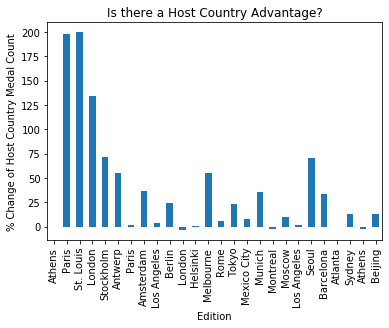

In [59]:
# Import pyplot
# import matplotlib.pyplot as plt

# Extract influence['Change']: change
change = influence['Change']

# Make bar plot of change: ax
ax = change.plot(kind='bar')

# Customize the plot to improve readability
ax.set_ylabel("% Change of Host Country Medal Count")
ax.set_title("Is there a Host Country Advantage?")
ax.set_xticklabels(editions['City'])

# Display the plot
plt.show()

----------